In [4]:
from dotenv import load_dotenv
load_dotenv()
import os
from PIL import Image

In [3]:
google_api_key = os.getenv('GOOGLE_API_KEY')
if not google_api_key: 
    raise ValueError("GOOGLE_API_KEY is not set in the environment variables.")

In [8]:
prompt = "Provide an example recipe for the baked goods in the image. "

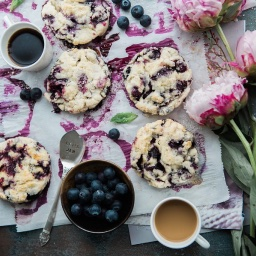

In [ ]:
# img = Image.open('baked_goods_1.jpg')
# img = Image.open('baked_goods_2.jpg')
img = Image.open('baked_goods_3.jpg')
img

In [6]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Markdown, clear_output, display
import base64, io

In [9]:
def image_url(img):
    buffered = io.BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return f"data:image/jpeg;base64,{img_str}"

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
message = HumanMessage(content=[
    {'type': 'text', 'text': prompt},
    {'type': 'image_url', 'image_url': image_url(img)},
])
response = model.stream([message])
buffer = []
for chunk in response:
    buffer.append(chunk.content)
    clear_output()
    display(Markdown(''.join(buffer)))

That image shows blueberry scones.  Here's a recipe that would produce similar results:


**Fluffy Blueberry Scones**

**Yields:** 8-10 scones
**Prep time:** 20 minutes
**Cook time:** 18-20 minutes


**Ingredients:**

* 2 1/2 cups all-purpose flour
* 1/4 cup granulated sugar
* 1 tbsp baking powder
* 1/2 tsp baking soda
* 1/4 tsp salt
* 1/2 cup (1 stick) cold unsalted butter, cut into small cubes
* 1 cup heavy cream
* 1/2 cup buttermilk
* 1 tsp vanilla extract
* 1 1/2 cups fresh blueberries (or frozen, slightly thawed)
* Coarse sugar, for sprinkling (optional)


**Instructions:**


1. **Preheat oven to 400°F (200°C).** Line a baking sheet with parchment paper.

2. **Whisk dry ingredients:** In a large bowl, whisk together the flour, sugar, baking powder, baking soda, and salt.

3. **Cut in butter:** Cut in the cold butter using a pastry blender or your fingers until the mixture resembles coarse crumbs.  Work quickly to prevent the butter from melting.

4. **Combine wet ingredients:** In a separate bowl, whisk together the heavy cream, buttermilk, and vanilla extract.

5. **Combine wet and dry:** Add the wet ingredients to the dry ingredients and gently stir until just combined. Do not overmix.

6. **Fold in blueberries:** Gently fold in the blueberries.

7. **Shape scones:** Turn the dough out onto a lightly floured surface and gently pat it into a 1-inch thick circle. Use a sharp knife or a biscuit cutter to cut the dough into 8-10 wedges.

8. **Bake:** Place the scones onto the prepared baking sheet. Sprinkle with coarse sugar, if desired. Bake for 18-20 minutes, or until golden brown.

9. **Cool:** Let the scones cool on the baking sheet for a few minutes before serving.  They are best served warm.


**Tips for Success:**

* **Use cold ingredients:** Cold butter and buttermilk are key to creating flaky scones.
* **Don't overmix:** Overmixing the dough will develop the gluten and result in tough scones.
* **Handle the dough gently:**  Gentle handling prevents the scones from becoming tough.
* **Adjust sweetness:**  If you prefer sweeter scones, you can increase the amount of sugar.


Enjoy your homemade blueberry scones!  They pair well with clotted cream and jam, or simply with a cup of coffee or tea, as shown in the image.
